In [84]:
%%writefile imageprocessing_script.py
# this is to create a new file 
# ALWAYS the first line of your cell
#write to script instead of run on notebook 
#command line arguments-> notebook-> CMD or SHELL or TERMINAL!
import argparse
ap = argparse.ArgumentParser()
ap.add_argument("-i","--image", required=True, help='provide input image full path')
args = vars(ap.parse_args())

Writing imageprocessing_script.py


In [85]:
%%writefile -a imageprocessing_script.py
# append mode script now 
import cv2
#from google.colab.patches import cv2_imshow
# comment for notebook
from cv2 import imshow 
#!ls


Appending to imageprocessing_script.py


In [86]:
%%writefile -a imageprocessing_script.py
img = cv2.imread(args["image"])
#cv2_imshow(img)

Appending to imageprocessing_script.py


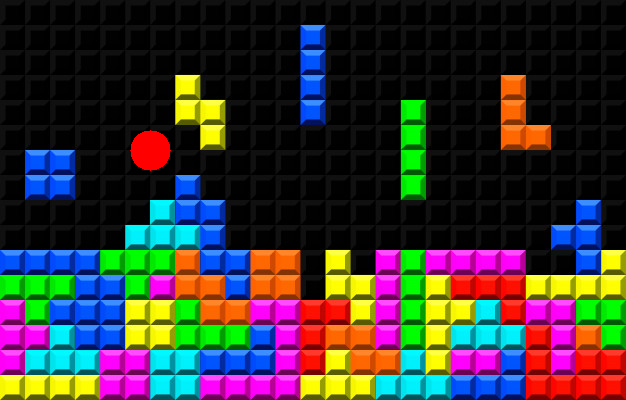

In [4]:
img2 = img.copy()
cv2.circle(img2, (150,150), 20, (0,0,255),-1) # BGR-> default 
cv2_imshow(img2)


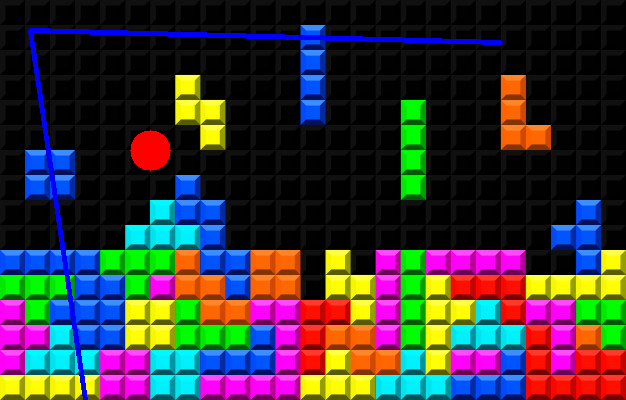

In [7]:
cv2.line(img2, (30,30), (500,42), (255,0,0), 3 )
cv2_imshow(img2)

In [87]:
%%writefile -a imageprocessing_script.py
img3 = img.copy()
cv2.line(img3, (100,100), (200,42), (25,10,90), 3 )
cv2.line(img3, (200,42), (300,192), (2,60,30), 3 )
cv2.line(img3, (300,192), (100,100), (255,255,30), 3 )

cv2.putText(img3, "Tetris can be fun", (10,30), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0,255,0), 3)
#cv2_imshow(img3)
fullpath = (args["image"]).split('.') # 2nd last parameter-> file name
filename, fileext= fullpath[-2], fullpath[-1]
finalname = filename + '_fun_demo' + fileext
cv2.imwrite(filename, img3)

Appending to imageprocessing_script.py


In [11]:
# Edges, OBjects, Activities-> COLOR doesn't matter! 
# Rotate or process and image-> losing 

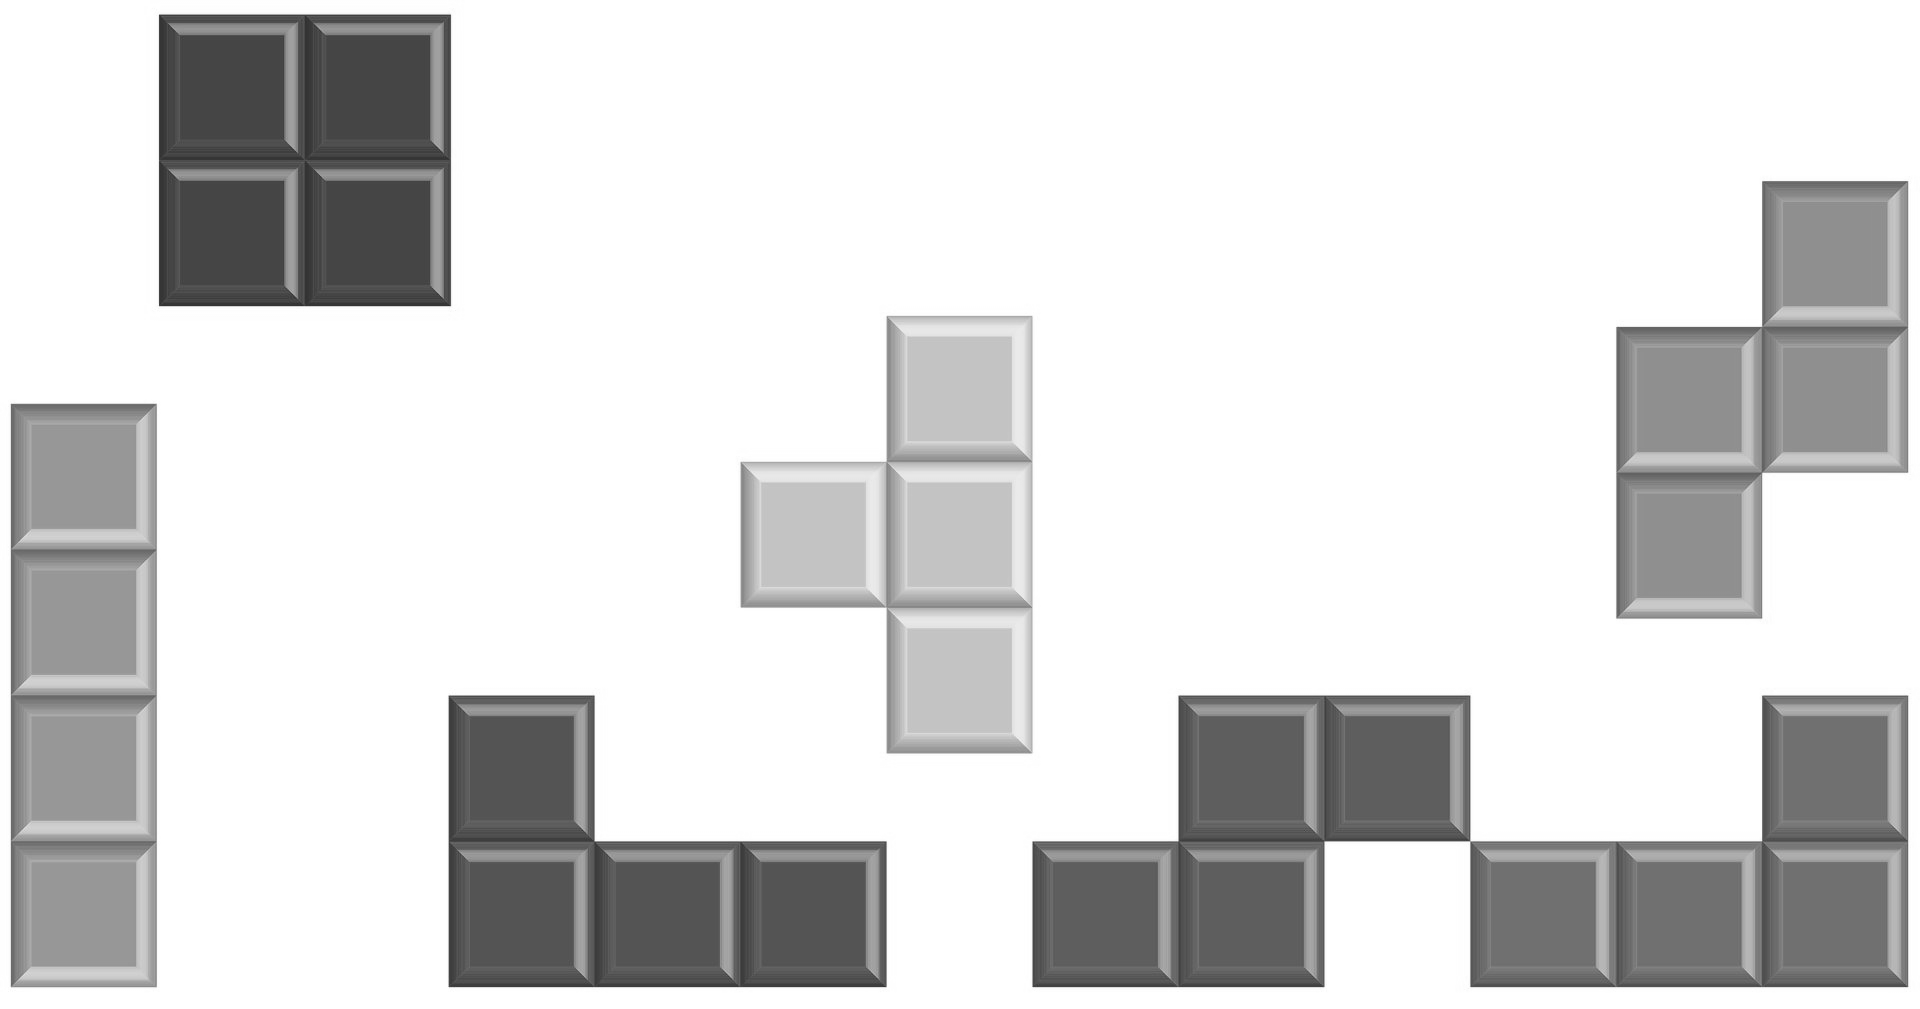

In [47]:
image = cv2.imread('tetris (1).jpg')
grayimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayimg)

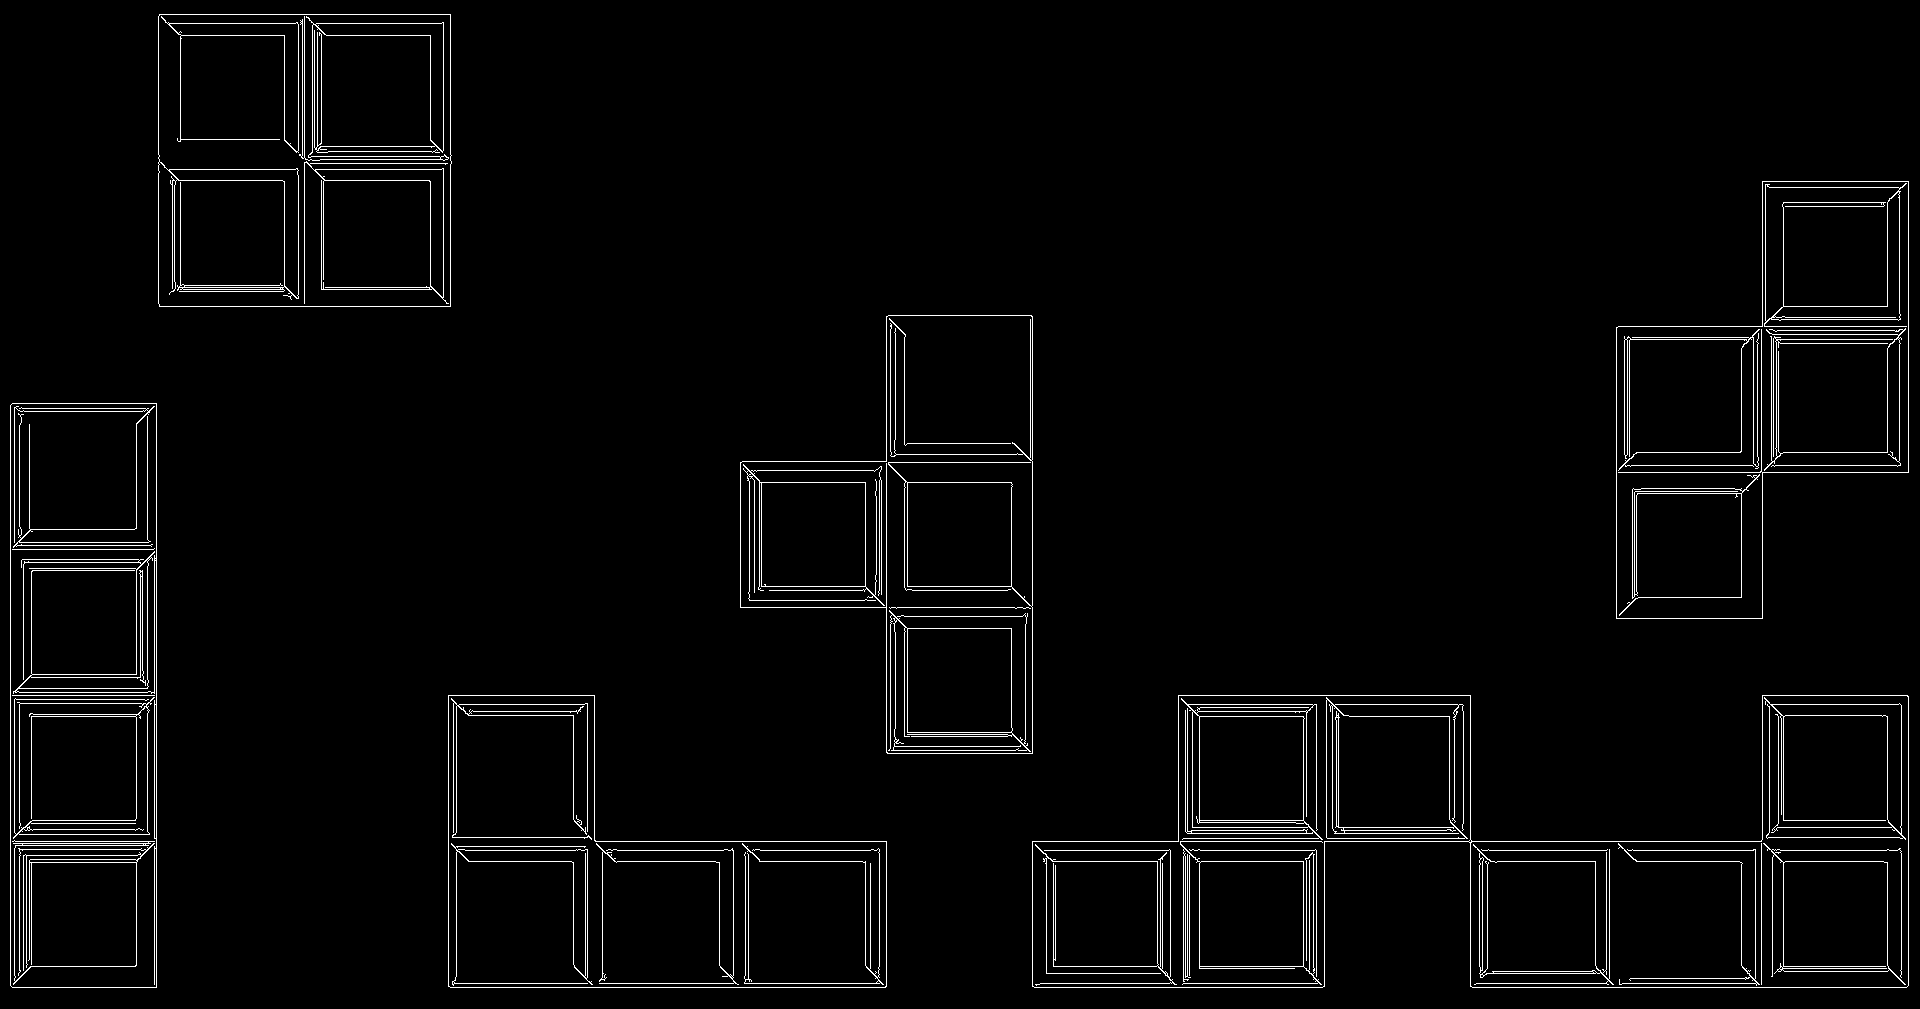

In [51]:
edged = cv2.Canny(grayimg, 0,200)
cv2_imshow(edged)

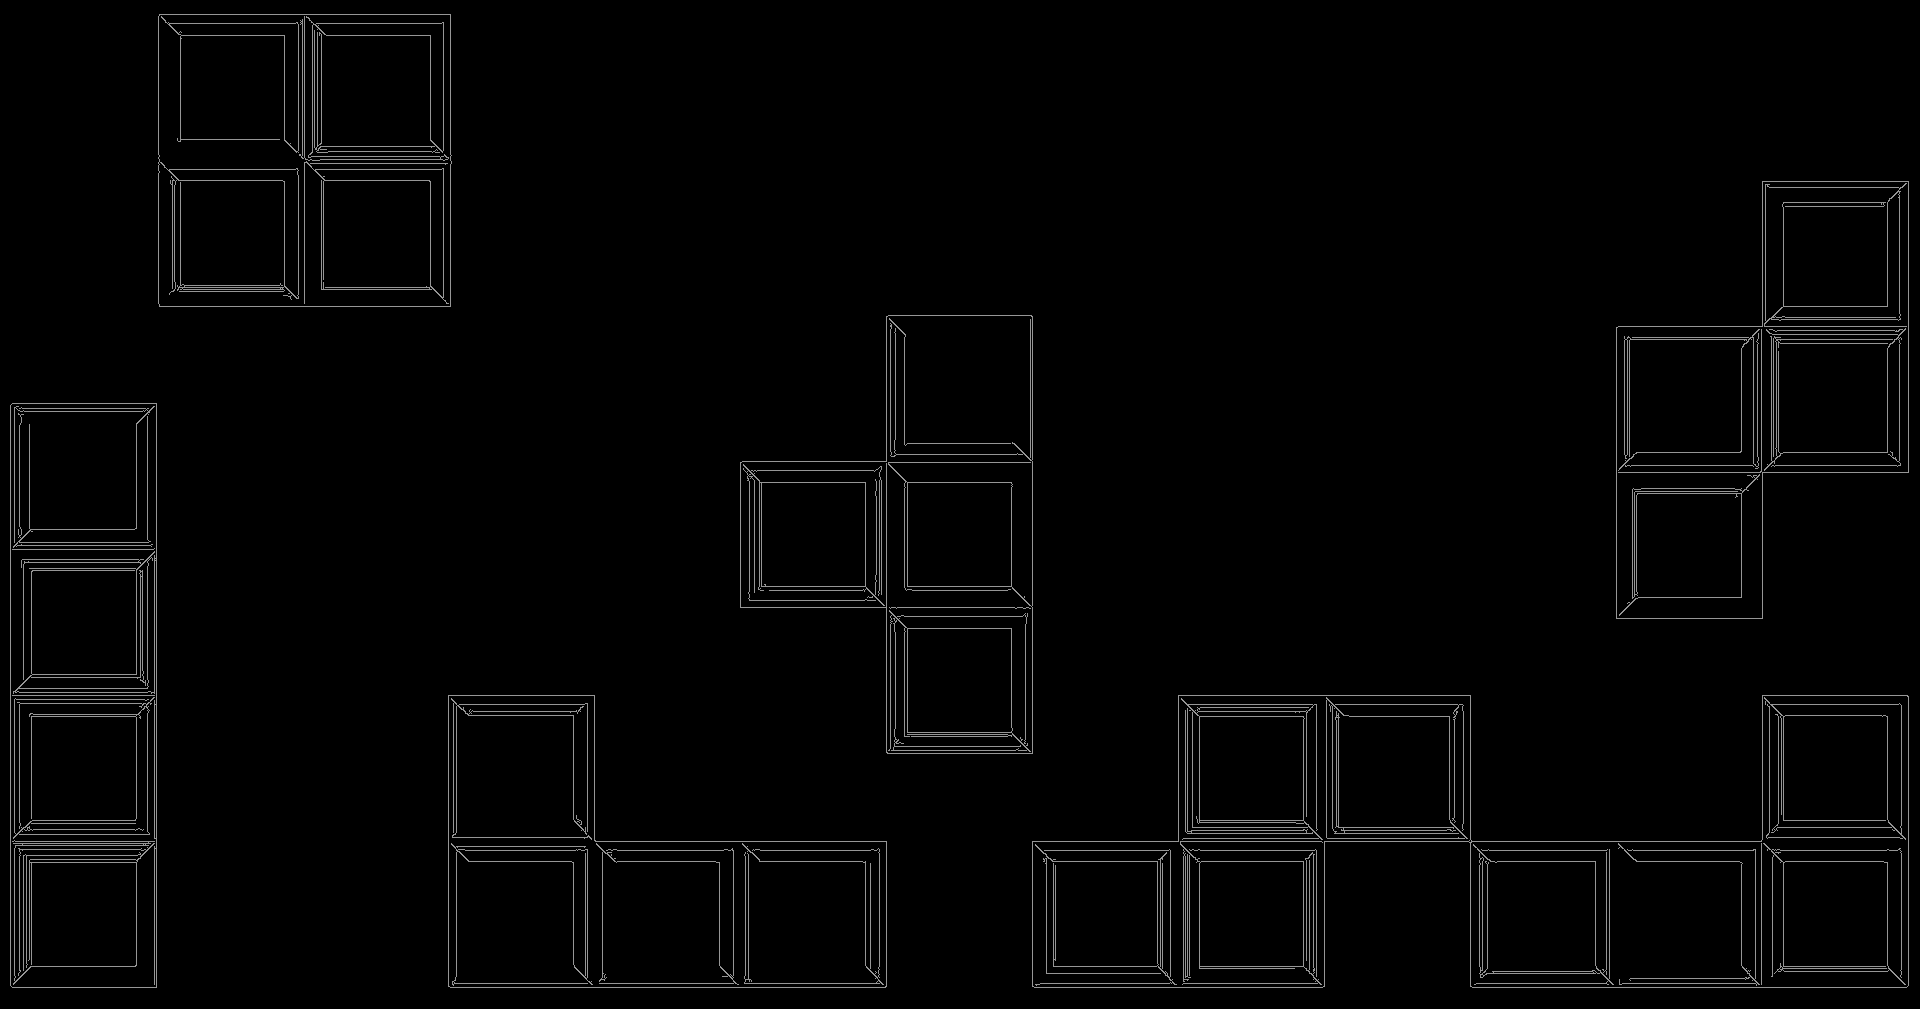

In [56]:
thresh = cv2.threshold(edged, 100,150, cv2.THRESH_BINARY)[1]
cv2_imshow(thresh)

In [58]:
import imutils
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(cnts)
len(contours)


6

In [63]:
output = image.copy()

In [64]:
colors = [ (100,200,50), (0,200,50), (100,200,), (100,75,50), (3,3,50), (3,200,3)]
for i,c in enumerate(contours):
  cv2.drawContours(output, [c], -1, colors[i], 3)

output = cv2.resize(output, (300,300))


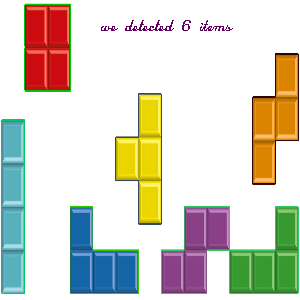

In [69]:
sentence = "we detected " + str(len(contours) )+ ' items'
cv2.putText(output, sentence, (100,30), cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
            0.5, (100,0,100))
cv2_imshow(output)

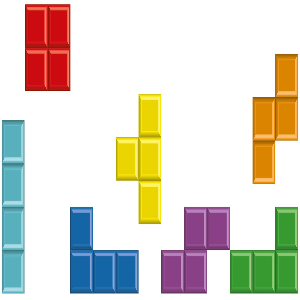

In [67]:
xx2 = cv2.resize(image, (300,300))
cv2_imshow(xx2)

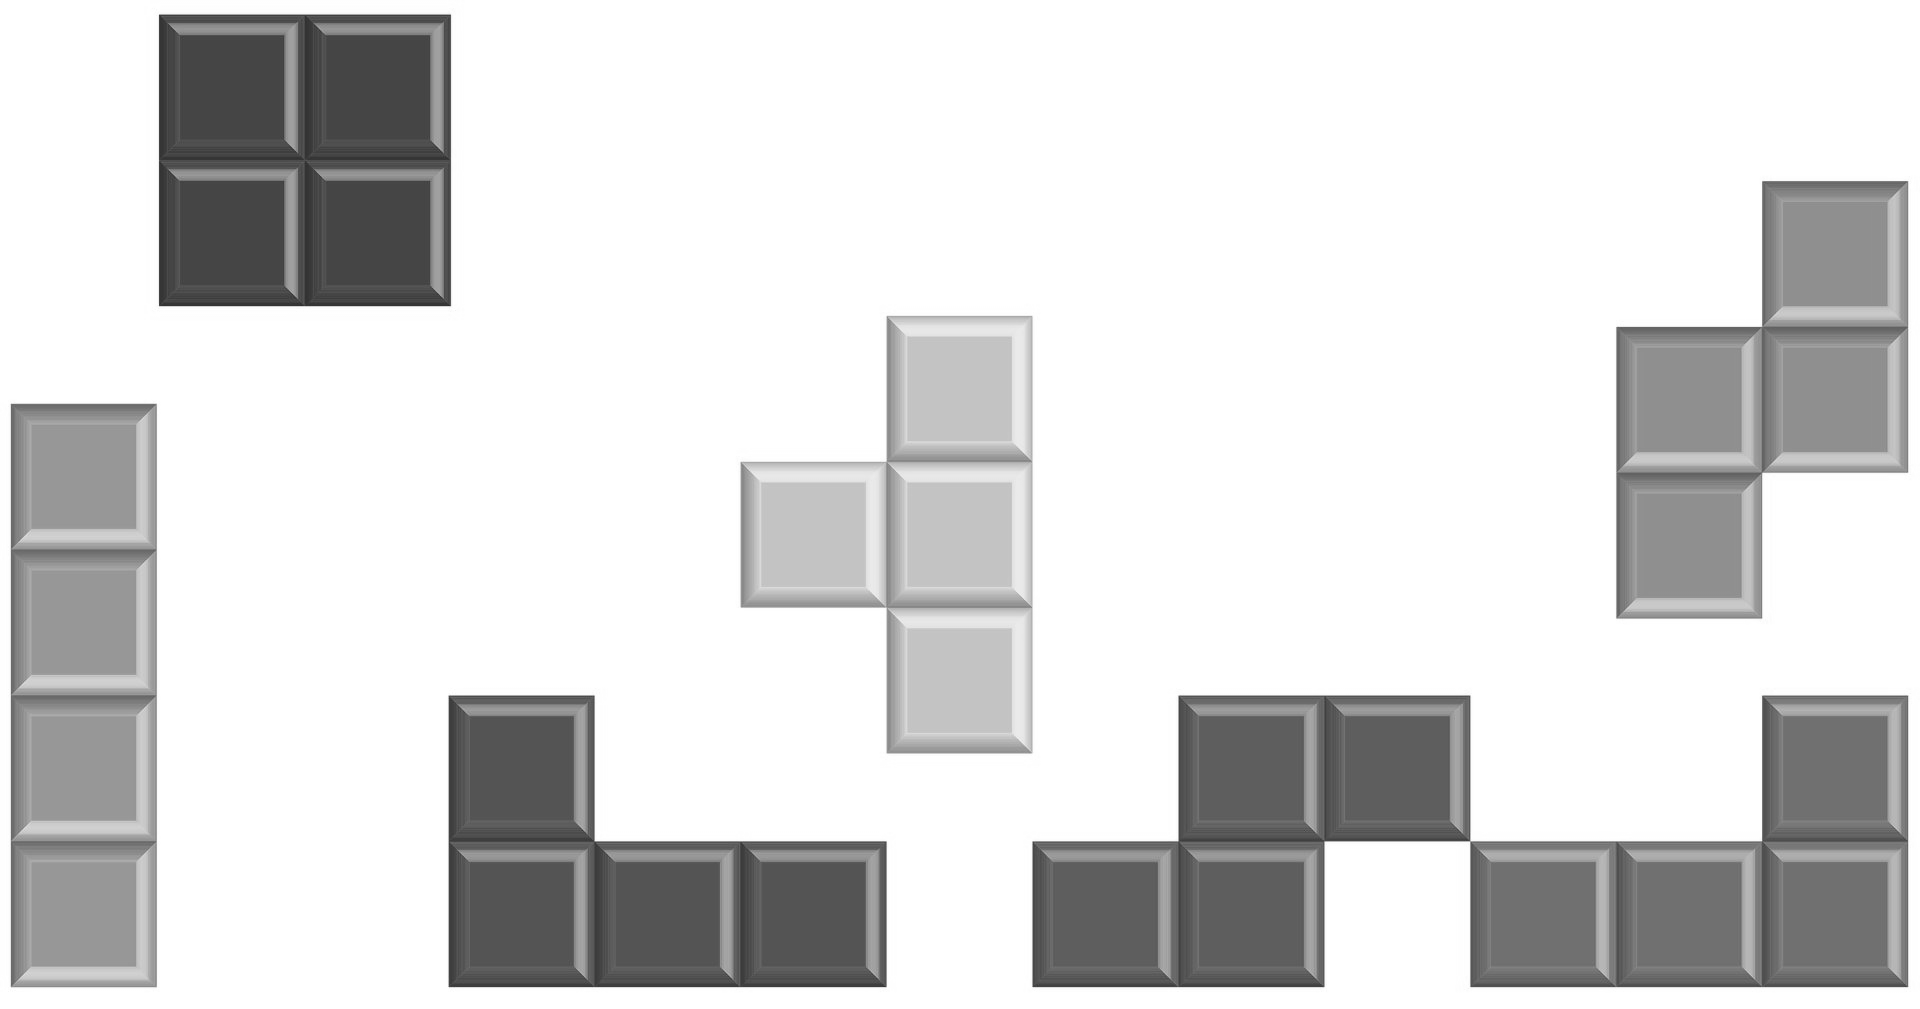

In [76]:

cv2_imshow(grayimg)

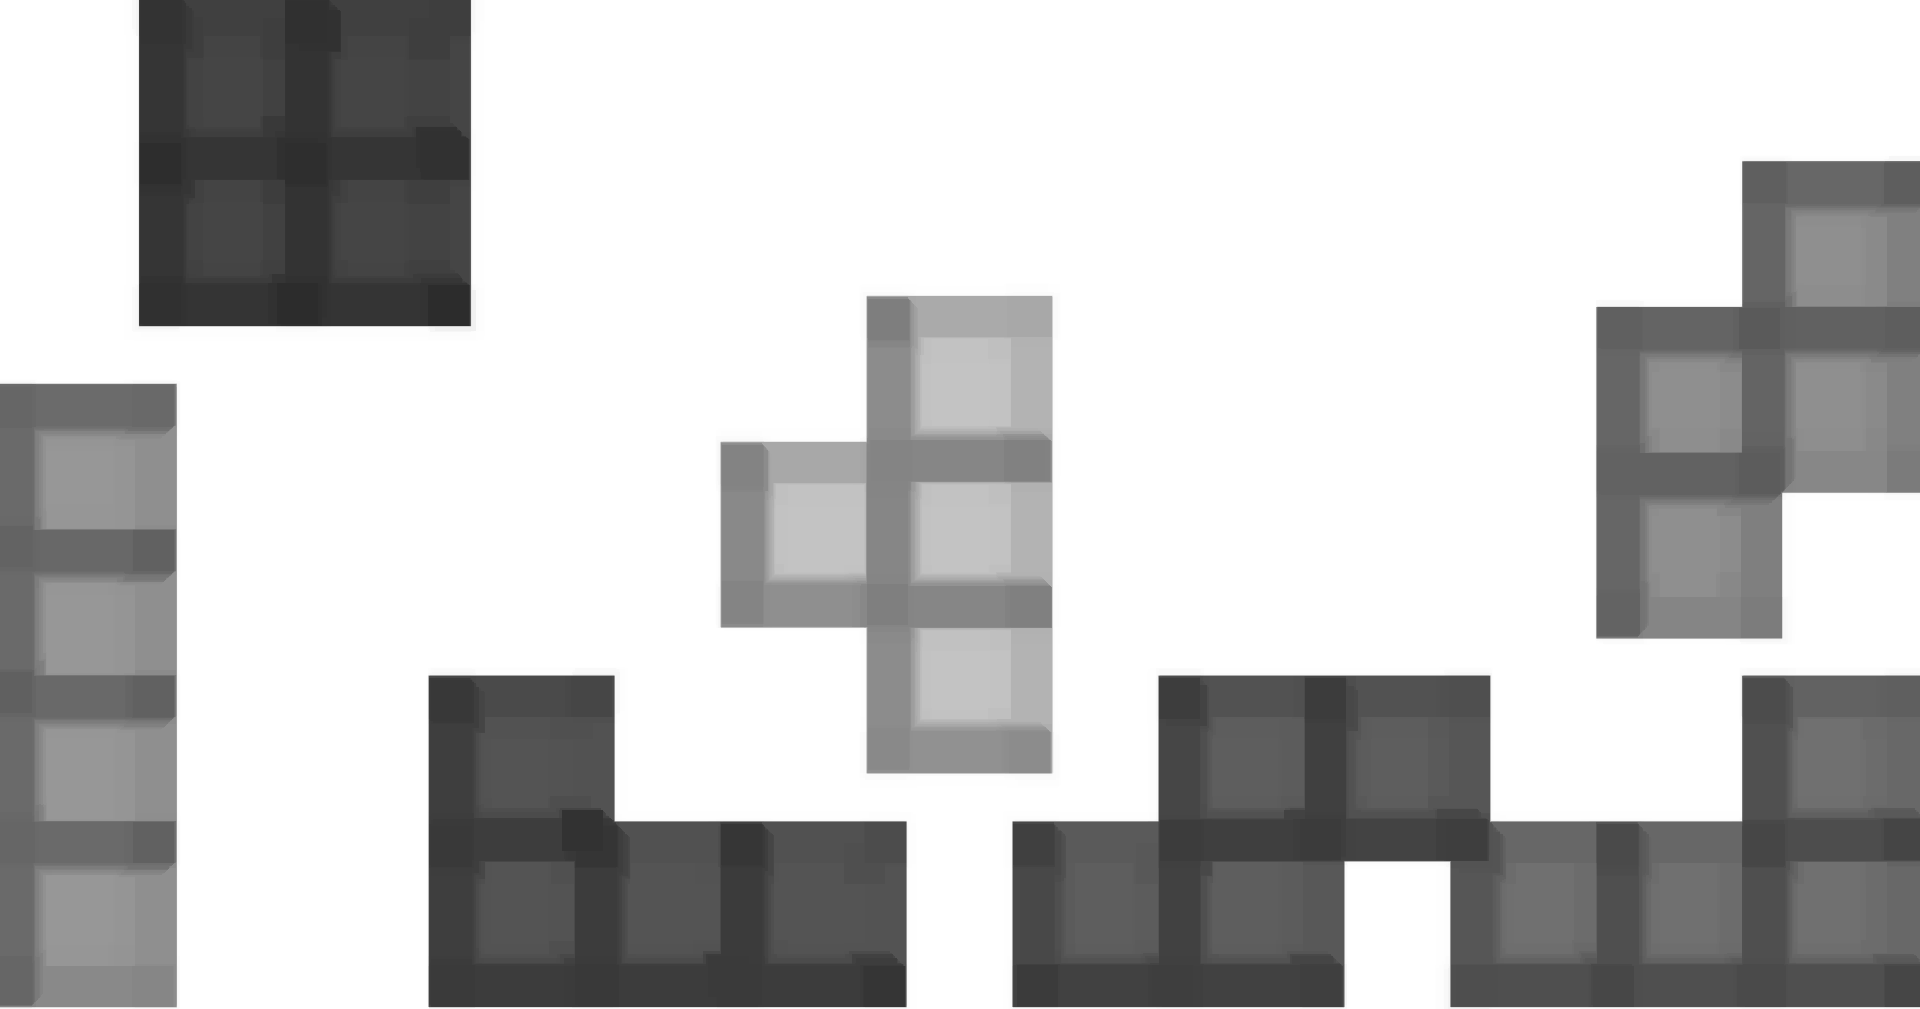

In [81]:
# EROSION-> sandpaper-> rub multiple iterations-> eroded image 
erosion = grayimg.copy()
erosion = cv2.erode(erosion, None, iterations=20)
cv2_imshow(erosion)

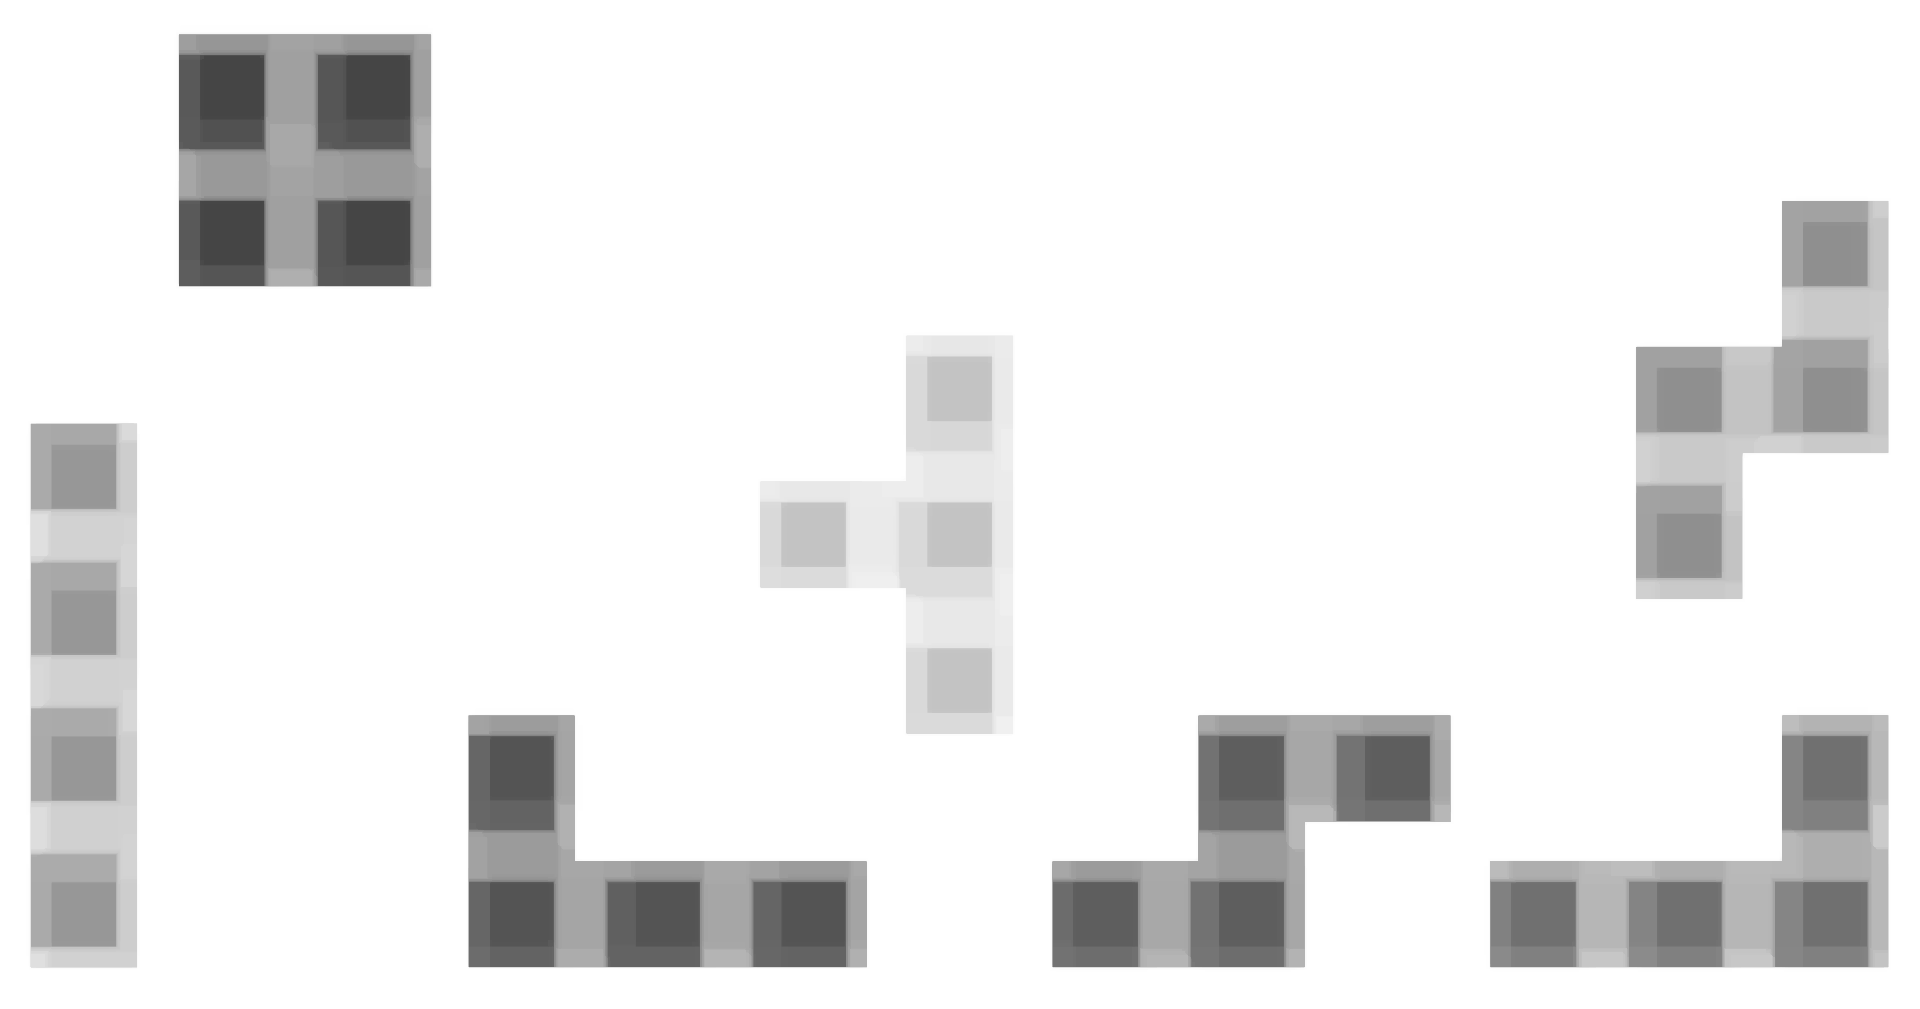

In [82]:
dial = grayimg.copy()
dial = cv2.dilate(dial, None, iterations=20)
cv2_imshow(dial)

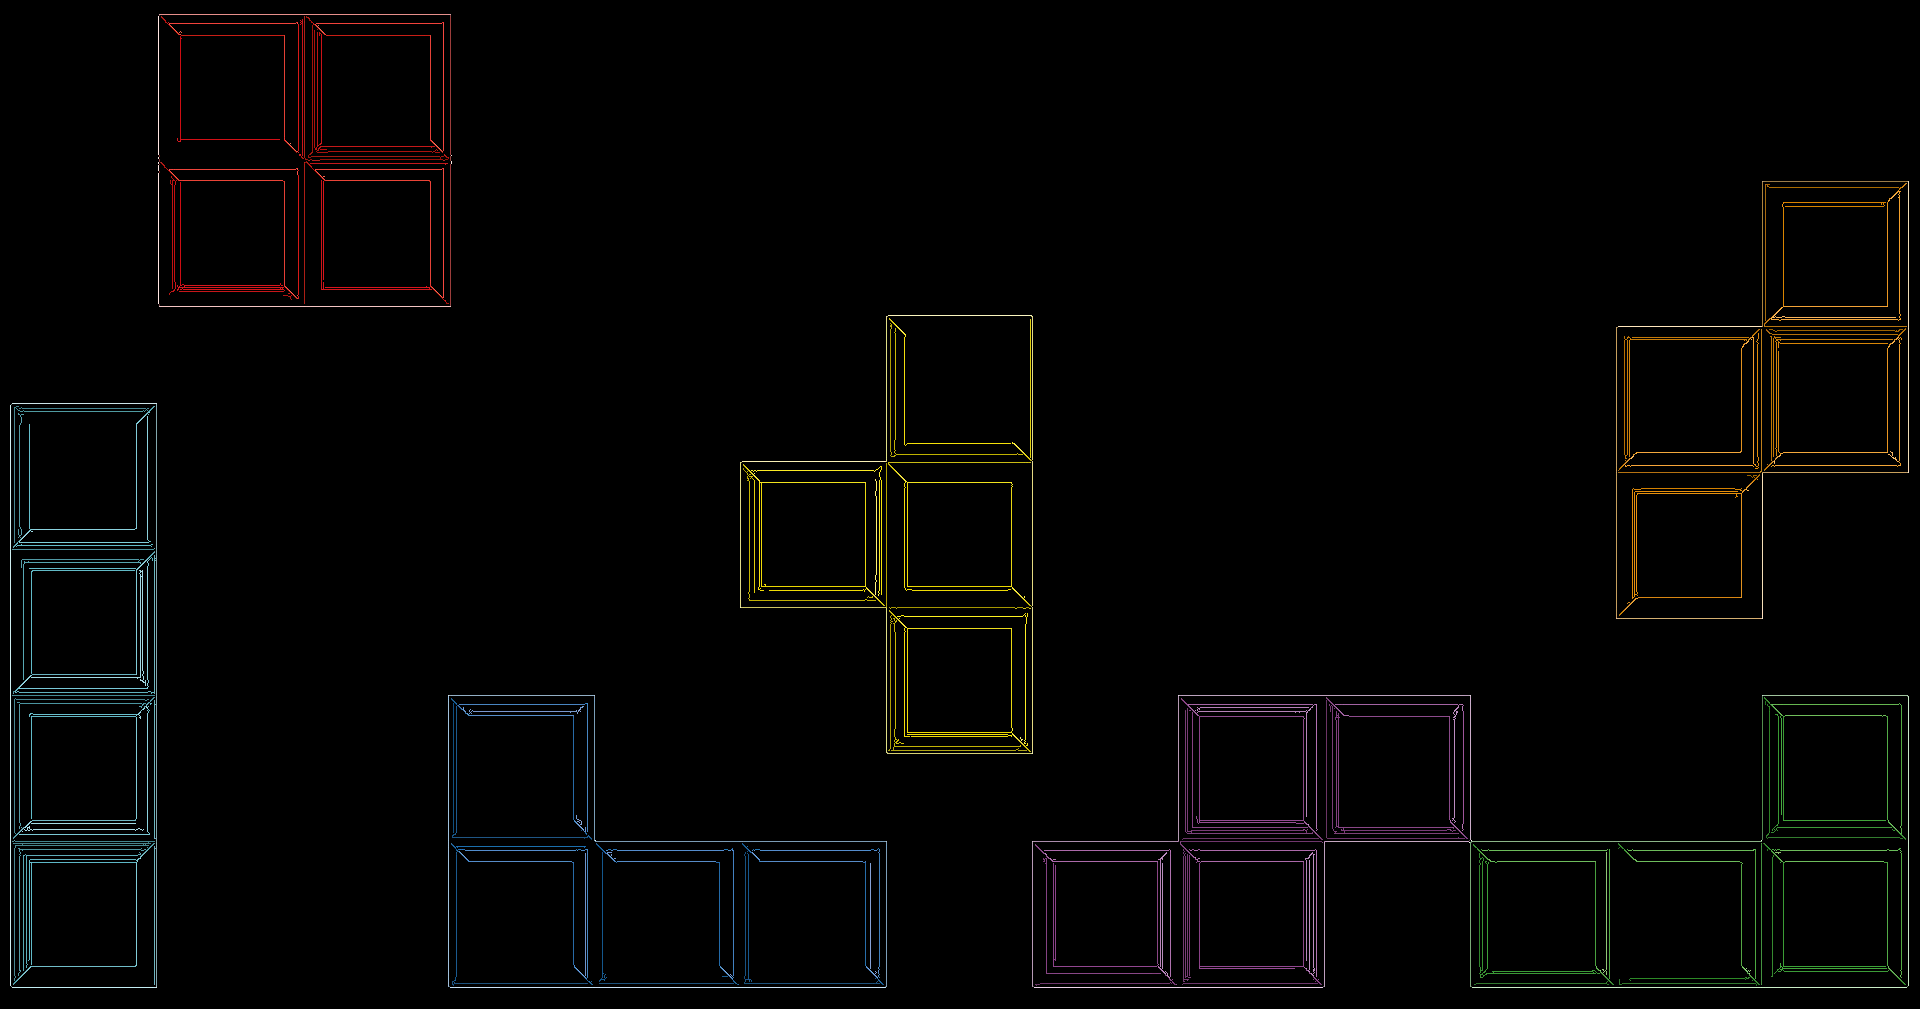

In [83]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)